In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [5]:
species = pd.read_csv('species_info.csv',encoding='utf-8')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [7]:
observation = pd.read_csv('observations.csv',encoding='utf-8')
observation.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [11]:
#To combine the dataframes
df = pd.concat([species, observation])
df.head()

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,NaN,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN,NaN,NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN,NaN,NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN,NaN,NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN,NaN,NaN


In [12]:
#Summary Statistics
print(df['observations'].describe())

count    23296.000000
mean       142.287904
std         69.890532
min          9.000000
25%         86.000000
50%        124.000000
75%        195.000000
max        321.000000
Name: observations, dtype: float64


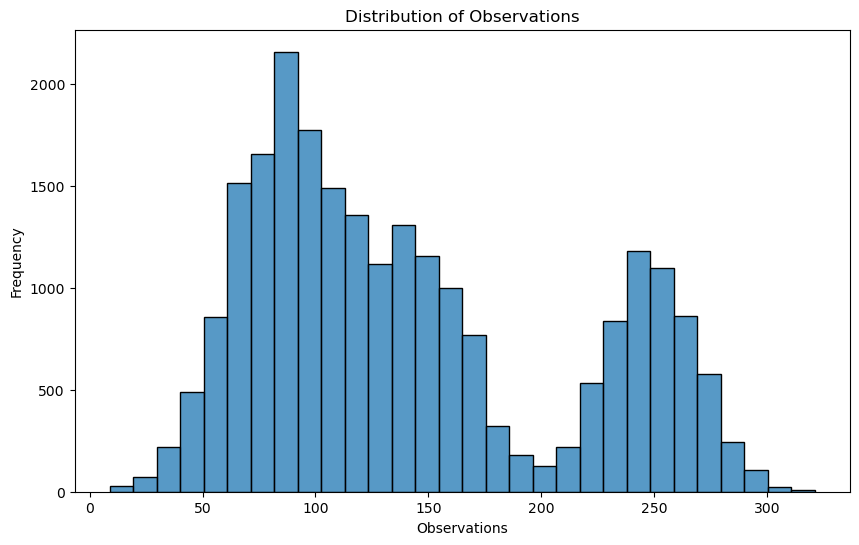

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(df['observations'], bins=30)
plt.title('Distribution of Observations')
plt.xlabel('Observations')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Species Count in Each Park
species_count = df.groupby('park_name')['scientific_name'].nunique().reset_index()
species_count.columns = ['park_name', 'unique_species_count']
species_count.head()

,park_name,unique_species_count
0,Bryce National Park,5541
1,Great Smoky Mountains National Park,5541
2,Yellowstone National Park,5541
3,Yosemite National Park,5541


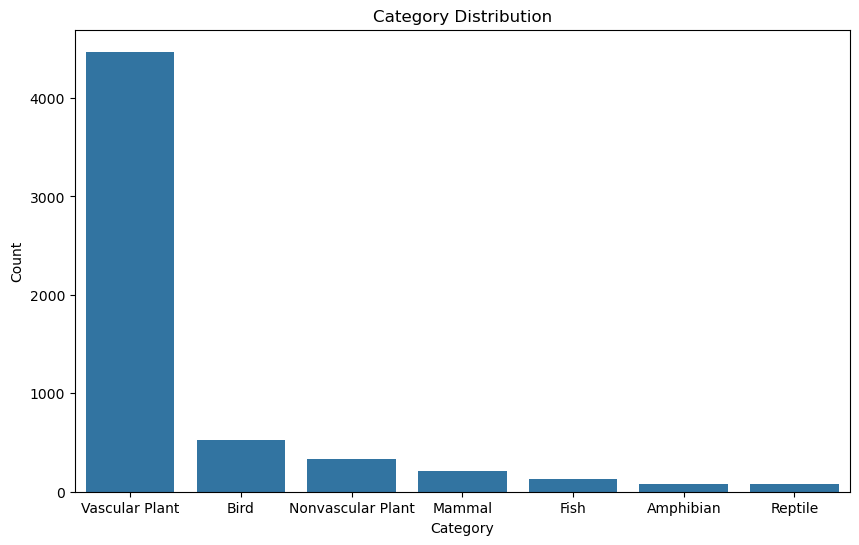

In [20]:
# Category Distribution
category_distribution = df['category'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=category_distribution.index, y=category_distribution.values)
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

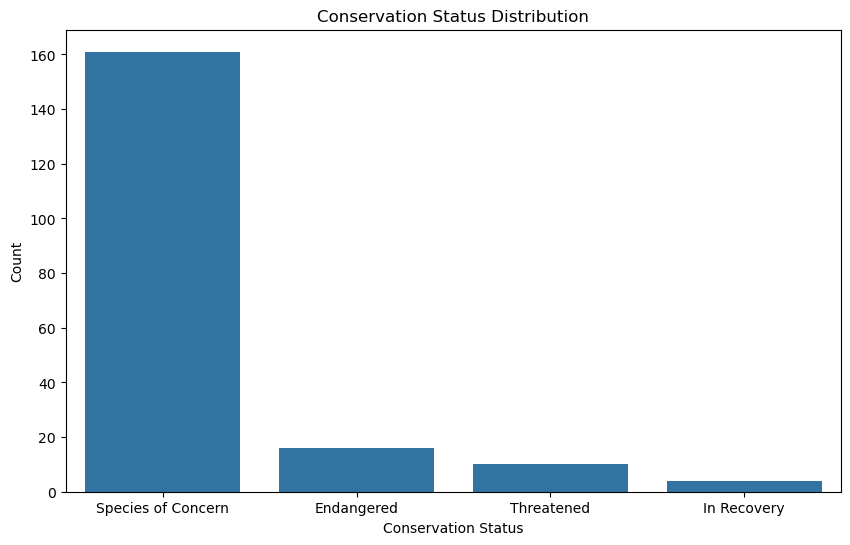

In [23]:
# Conservation Status Distribution
category_distribution = df['conservation_status'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=category_distribution.index, y=category_distribution.values)
plt.title('Conservation Status Distribution')
plt.xlabel('Conservation Status')
plt.ylabel('Count')
plt.show()
#It can be seen that the most eye-catching category is "Species of Concern'. 

In [38]:
# Most Observed Species
species_count = df.groupby('scientific_name')['observations'].sum()
count_max = species_count.max()
max_species = species_count.idxmax()
print(f"{max_species}: {count_max} observations")

Streptopelia decaocto: 1785.0 observations


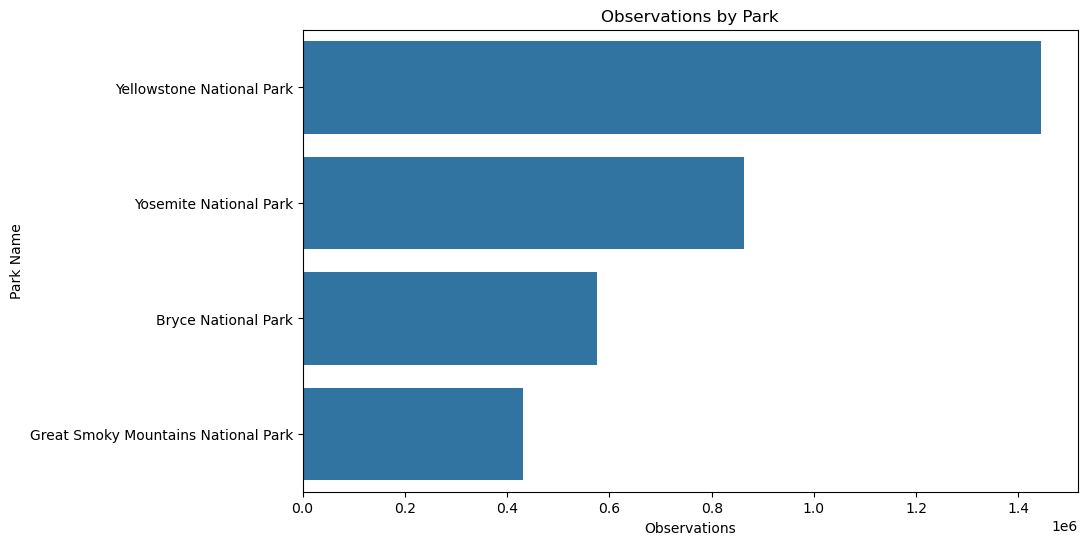

In [39]:
# Park-wise Observations
park_observations = df.groupby('park_name')['observations'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='observations', y='park_name', data=park_observations.sort_values('observations', ascending=False))
plt.title('Observations by Park')
plt.xlabel('Observations')
plt.ylabel('Park Name')
plt.show()
#Yellowstine National Park shows the highest number of observations.
#While in Great Smoky Mountains National Park the smallest number of detected observations. 

In [56]:
conservationCategory = df.groupby(["conservation_status", "category"])['scientific_name'].count().unstack()

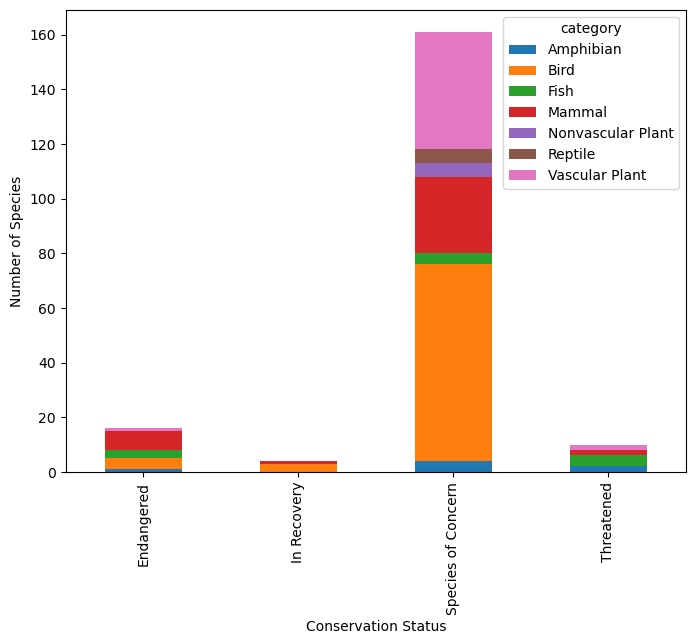

In [57]:
ax = conservationCategory.plot(kind = 'bar', figsize=(8,6), 
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");
#Here it can be seen that in the most noticeable conservation status "Species of Concern" category which attracts most of our attention is "Bird".
#This is intersting observation, because previously in "Category Distribution" graph we saw that the most noticeable was "Vascualr Plant".
#However, now we see that on the level of conservation statuses it is not so noticeable. 